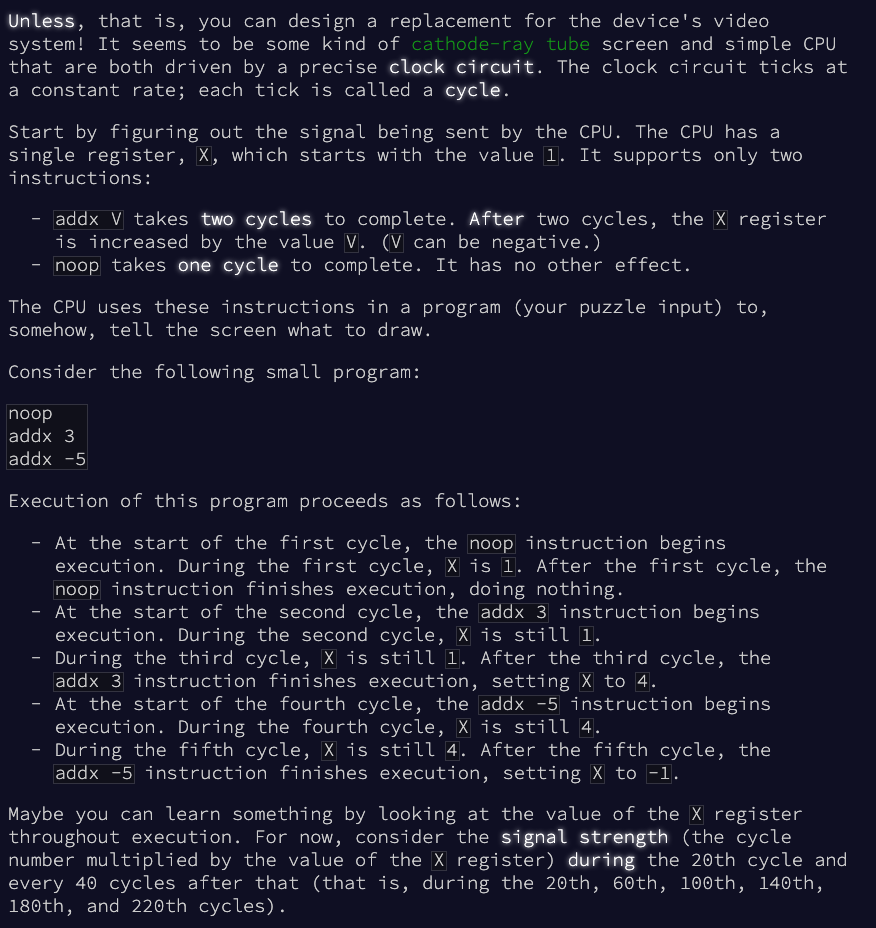

In [1]:
from IPython import display
display.Image("day10part1instructionsA.jpeg")

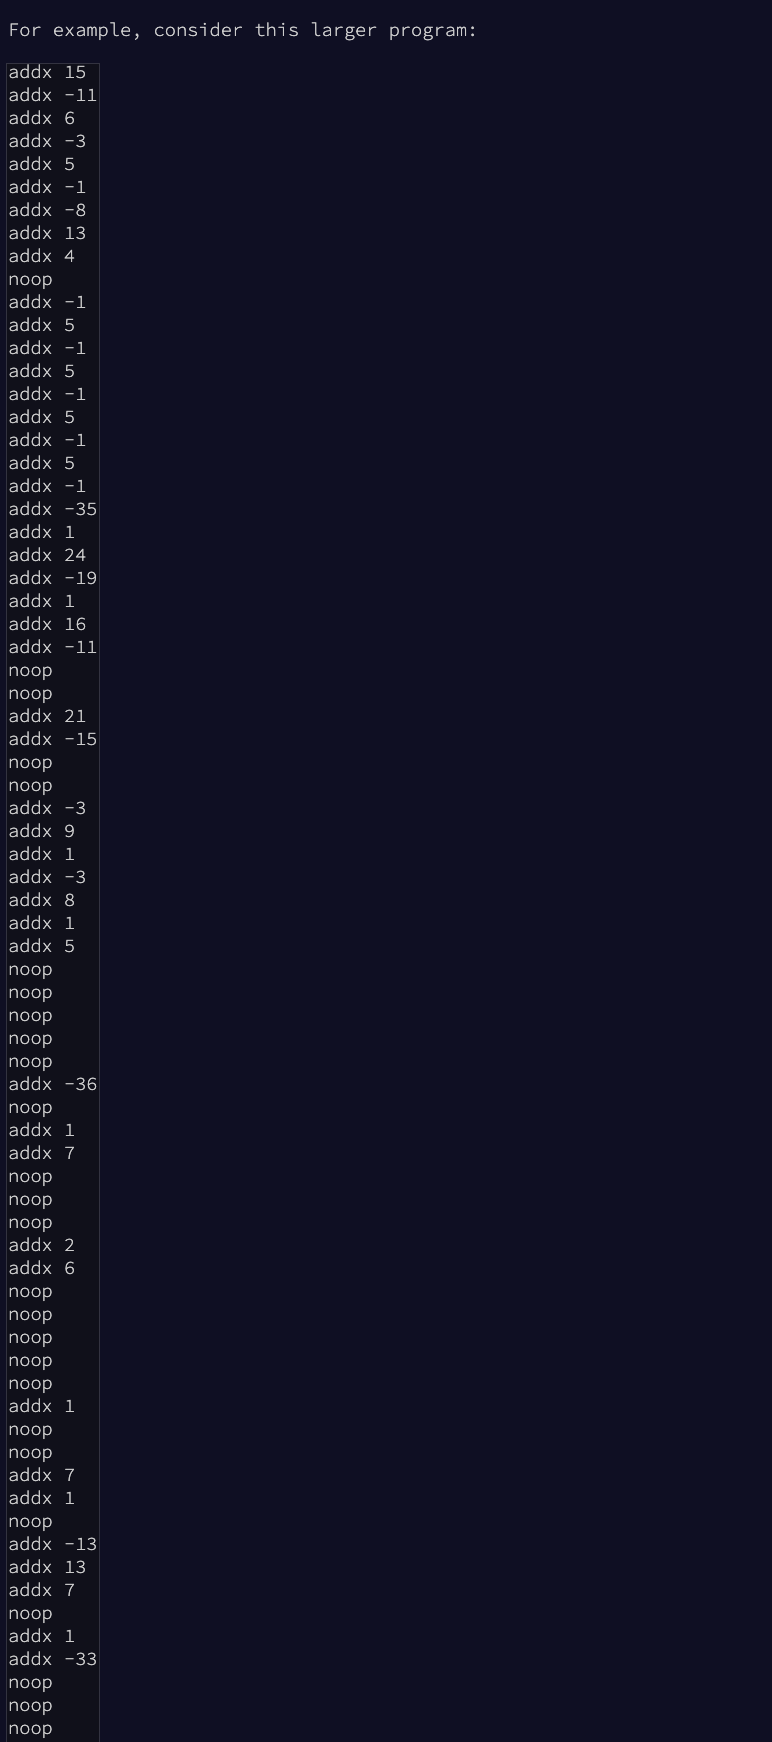

In [2]:
display.Image("day10part1instructionsB.jpeg")

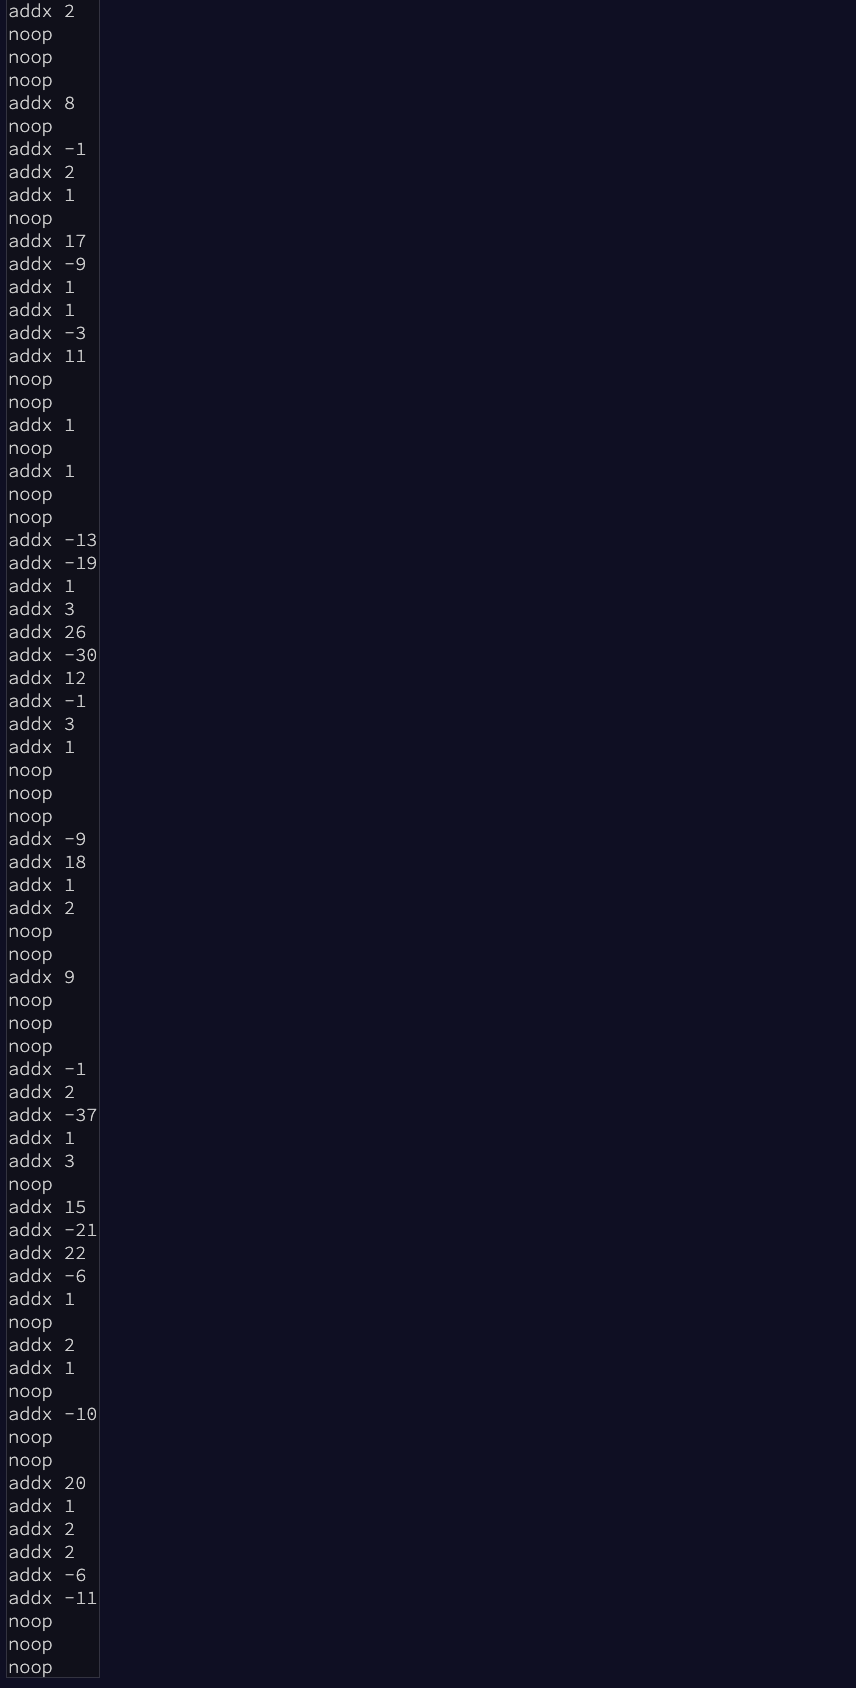

In [3]:
display.Image("day10part1instructionsC.jpeg")

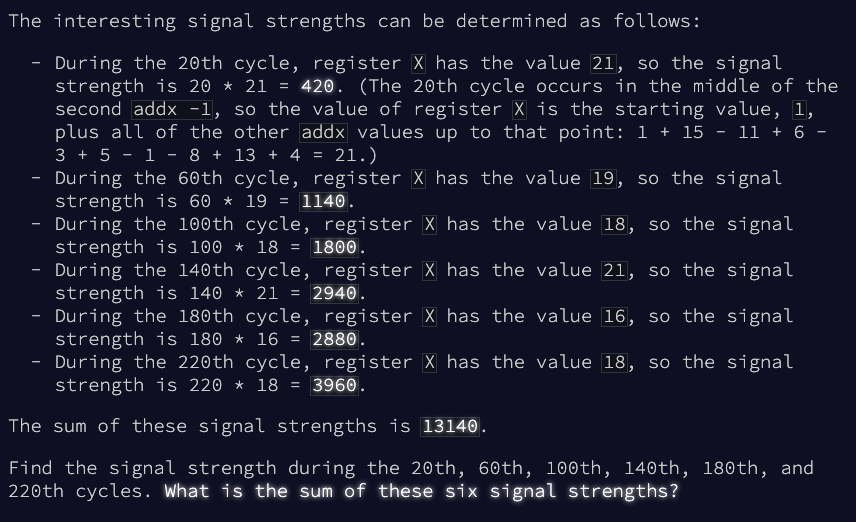

In [4]:
display.Image("day10part1instructionsD.jpeg")

<b>TESTING ON FIRST EXAMPLE</b>

In [5]:
# signal list matching first sample

signals = ['noop', 'addx 3', 'addx -5']

signals

['noop', 'addx 3', 'addx -5']

In [6]:
# start register at 1
# create empty queue

# iterate through cycles
#    adding signals to the queue as they come in one by one, 
#    each signal is given its own timer, counting down from 1 for 'noop' signals, 2 for 'addx' signals.
#    during each cycle subtract 1 from the timer of only the first item in the queue.
#    if its timer hits 0, that signal is removed from the queue and its action is triggered, 
#    'noop' add 0 to the register, 'addx' adds whatever its value is to the register

# eventually new signals will stop coming in, but the queue will still contain signals that haven't triggered yet
# when this happens, continue iterating through the cycles, 
#    counting down timer on the first item in the queue -1 per cycle,
#    triggereing signal actions, adding to the register, removing triggered signals until queue is empty.


def program(signals):
   
    register = 1
    action_list = []
    cycle = 0
    
    action_list = []

    for count, signal in enumerate(signals):
        
        cycle += 1
        print('start of cycle ', cycle)
        print('register = ', register)
        
        if signal == 'noop':
            action_list.append([1,0])
            print('*noop added to action list*')
        else:
            value = int(signal.split()[1])
            action_list.append([2,value])
            print(f'*{value} added to action list*')
        
        print('timed actions list: ', action_list)
        
        if len(action_list) > 0:
            next_action = action_list[0]
            next_action[0] -= 1
            if next_action[0] == 0:
                register += next_action[1]
                action_list = action_list[1:]
        
        print('     end of cycle', cycle)
        print('     register = ', register)
        print()
        
    if count == len(signals)-1:
        print('transmission over')
        print()
        
        while len(action_list) > 0:

            cycle += 1
            print('start of cycle: ', cycle)
            print('register = ', register)
            print(action_list)
            
            next_action = action_list[0]
            next_action[0] -= 1
            if next_action[0] == 0:
                register += next_action[1]
                action_list = action_list[1:]

            print('     end of cycle: ', cycle)
            print('     register = ', register)
            print()
    
    print('program over')   

In [7]:
program(signals)

start of cycle  1
register =  1
*noop added to action list*
timed actions list:  [[1, 0]]
     end of cycle 1
     register =  1

start of cycle  2
register =  1
*3 added to action list*
timed actions list:  [[2, 3]]
     end of cycle 2
     register =  1

start of cycle  3
register =  1
*-5 added to action list*
timed actions list:  [[1, 3], [2, -5]]
     end of cycle 3
     register =  4

transmission over

start of cycle:  4
register =  4
[[2, -5]]
     end of cycle:  4
     register =  4

start of cycle:  5
register =  4
[[1, -5]]
     end of cycle:  5
     register =  -1

program over


<b>TESTING ON SECOND EXAMPLE</b>

In [8]:
# retrieving second example signals 

with open('day10sample2input.txt') as day10sample:
    raw_input = day10sample.read()

raw_input

'addx 15\naddx -11\naddx 6\naddx -3\naddx 5\naddx -1\naddx -8\naddx 13\naddx 4\nnoop\naddx -1\naddx 5\naddx -1\naddx 5\naddx -1\naddx 5\naddx -1\naddx 5\naddx -1\naddx -35\naddx 1\naddx 24\naddx -19\naddx 1\naddx 16\naddx -11\nnoop\nnoop\naddx 21\naddx -15\nnoop\nnoop\naddx -3\naddx 9\naddx 1\naddx -3\naddx 8\naddx 1\naddx 5\nnoop\nnoop\nnoop\nnoop\nnoop\naddx -36\nnoop\naddx 1\naddx 7\nnoop\nnoop\nnoop\naddx 2\naddx 6\nnoop\nnoop\nnoop\nnoop\nnoop\naddx 1\nnoop\nnoop\naddx 7\naddx 1\nnoop\naddx -13\naddx 13\naddx 7\nnoop\naddx 1\naddx -33\nnoop\nnoop\nnoop\naddx 2\nnoop\nnoop\nnoop\naddx 8\nnoop\naddx -1\naddx 2\naddx 1\nnoop\naddx 17\naddx -9\naddx 1\naddx 1\naddx -3\naddx 11\nnoop\nnoop\naddx 1\nnoop\naddx 1\nnoop\nnoop\naddx -13\naddx -19\naddx 1\naddx 3\naddx 26\naddx -30\naddx 12\naddx -1\naddx 3\naddx 1\nnoop\nnoop\nnoop\naddx -9\naddx 18\naddx 1\naddx 2\nnoop\nnoop\naddx 9\nnoop\nnoop\nnoop\naddx -1\naddx 2\naddx -37\naddx 1\naddx 3\nnoop\naddx 15\naddx -21\naddx 22\naddx -6\na

In [9]:
signals = raw_input.splitlines()

signals[:15]


['addx 15',
 'addx -11',
 'addx 6',
 'addx -3',
 'addx 5',
 'addx -1',
 'addx -8',
 'addx 13',
 'addx 4',
 'noop',
 'addx -1',
 'addx 5',
 'addx -1',
 'addx 5',
 'addx -1']

In [10]:
# same function as above, but this time keeping track of register values at cycles 20, 60, 100, 140, 180, and 200

def program(signals):
   
    cycle = 0
    register = 1
    action_list = []
    
    cycle_20 = [20,0]
    cycle_60 = [60,0]
    cycle_100 = [100,0]
    cycle_140 = [140,0]
    cycle_180 = [180,0]
    cycle_220 = [220,0]

    for count, signal in enumerate(signals):
        
        cycle += 1
        
        if cycle == 20:
            cycle_20[1] = register
        elif cycle == 60:
            cycle_60[1] = register
        elif cycle == 100:
            cycle_100[1] = register
        elif cycle == 140:
            cycle_140[1] = register
        
        if signal == 'noop':
            action_list.append([1,0])
        else:
            value = int(signal.split()[1])
            action_list.append([2,value])
        
        if len(action_list) > 0:
            next_action = action_list[0]
            next_action[0] -= 1
            if next_action[0] == 0:
                register += next_action[1]
                action_list = action_list[1:]
        
        while len(action_list) > 0:

            cycle += 1
            
            if cycle == 180:
                cycle_180[1] = register
            elif cycle == 220:
                cycle_220[1] = register  
            
            next_action = action_list[0]
            next_action[0] -= 1
            if next_action[0] == 0:
                register += next_action[1]
                action_list = action_list[1:]

    return [cycle_20, cycle_60, cycle_100, cycle_140, cycle_180, cycle_220]

In [11]:
# tracked cycles and their register values 

results = program(signals)

results

[[20, 21], [60, 19], [100, 18], [140, 21], [180, 0], [220, 18]]

In [12]:
# multiplying each cycle by its register malue 

interesting_signals = []
    
for result in results:
    interesting_signals.append(result[0] * result[1])
    
interesting_signals

[420, 1140, 1800, 2940, 0, 3960]

In [13]:
# summing them all together 

sum(interesting_signals)

10260

<b>SOLVING ON ACTUAL PUZZLE INPUT</b>

In [14]:
# same strategy above, this time on the actual puzzle input 

with open('day10input.txt') as day10input:
    raw_input = day10input.read()

raw_input

'addx 1\naddx 4\nnoop\nnoop\nnoop\naddx 5\naddx 3\nnoop\naddx 2\nnoop\nnoop\nnoop\nnoop\naddx 3\naddx 5\naddx 2\naddx 1\nnoop\naddx 5\naddx -1\naddx 5\nnoop\naddx 3\nnoop\naddx -40\nnoop\naddx 38\naddx -31\naddx 3\nnoop\naddx 2\naddx -7\naddx 8\naddx 2\naddx 5\naddx 2\naddx 3\naddx -2\nnoop\nnoop\nnoop\naddx 5\naddx 2\nnoop\naddx 3\naddx 2\nnoop\naddx 3\naddx -36\nnoop\nnoop\naddx 5\nnoop\nnoop\naddx 8\naddx -5\naddx 5\naddx 2\naddx -15\naddx 16\naddx 4\nnoop\naddx 1\nnoop\nnoop\naddx 4\naddx 5\naddx -30\naddx 35\naddx -1\naddx 2\naddx -36\naddx 5\nnoop\nnoop\naddx -2\naddx 5\naddx 2\naddx 3\nnoop\naddx 2\nnoop\nnoop\naddx 5\nnoop\naddx 14\naddx -13\naddx 5\naddx -14\naddx 18\naddx 3\naddx 2\naddx -2\naddx 5\naddx -40\nnoop\naddx 32\naddx -25\naddx 3\nnoop\naddx 2\naddx 3\naddx -2\naddx 2\naddx 2\nnoop\naddx 3\naddx 5\naddx 2\naddx 9\naddx -36\naddx 30\naddx 5\naddx 2\naddx -25\naddx 26\naddx -38\naddx 10\naddx -3\nnoop\nnoop\naddx 22\naddx -16\naddx -1\naddx 5\naddx 3\nnoop\naddx 2\na

In [15]:
signals = raw_input.splitlines()

signals[:15]

['addx 1',
 'addx 4',
 'noop',
 'noop',
 'noop',
 'addx 5',
 'addx 3',
 'noop',
 'addx 2',
 'noop',
 'noop',
 'noop',
 'noop',
 'addx 3',
 'addx 5']

In [16]:
results = program(signals)

In [17]:
results

[[20, 0], [60, 21], [100, 0], [140, 21], [180, 16], [220, 0]]

In [18]:
interesting_signals = []
    
for result in results:
    interesting_signals.append(result[0] * result[1])
    
interesting_signals

[0, 1260, 0, 2940, 2880, 0]

In [19]:
sum(interesting_signals)

7080